# Onsets

In [1]:
from maelzel.snd import features, audiosample
import numpy as np
from maelzel.core import *
from pitchtools import *
import matplotlib.pyplot as plt

import csoundengine as ce

In [2]:
samp = audiosample.Sample("snd/finneganswake-fragm01.flac").getChannel(0, contiguous=True)[0:10]

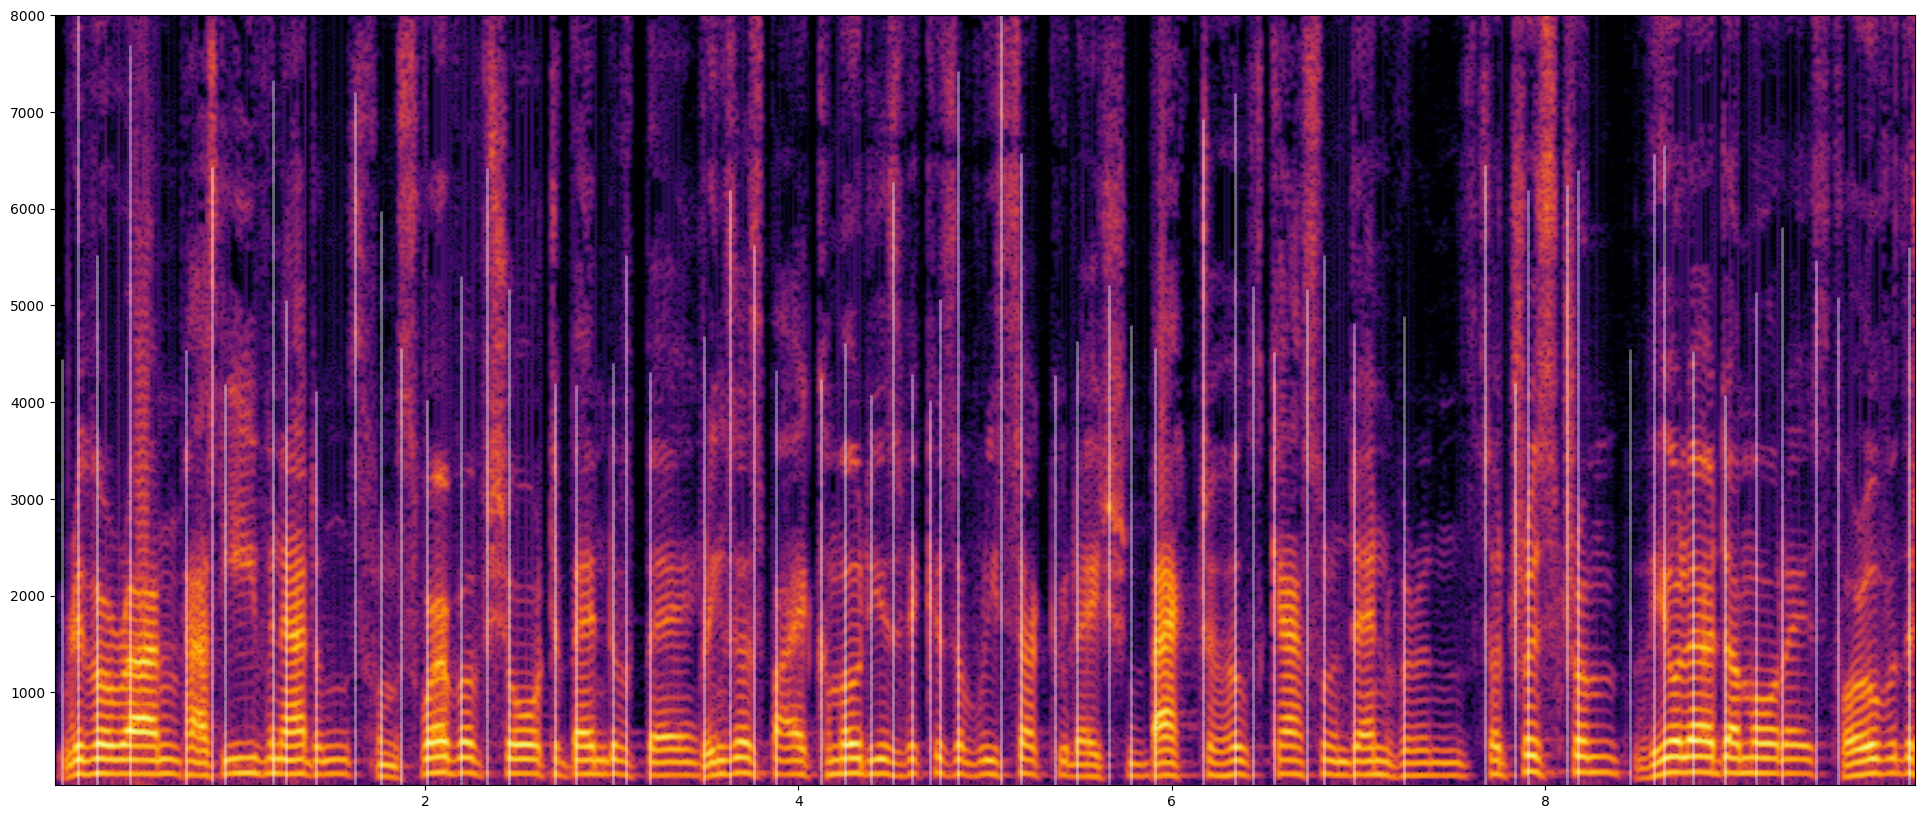

In [3]:
onsets, onsetStrength = features.onsets(samp.samples, sr=samp.sr, threshold=0.1, mingap=1/20, winsize=2048, hopsize=512, backtrack=False)
ax = samp.plotSpectrogram(maxfreq=8000)

# Plot each onset as a vertical line
ymax = 4000 + onsetStrength.map(onsets)*2000
ax.vlines(onsets, ymin=0, ymax=ymax, color='white', alpha=0.4, linewidth=2)


In [4]:
from maelzel.snd import freqestimate
freqbpf, voicedbpf = freqestimate.f0curvePyinVamp(sig=samp.samples, sr=samp.sr,  
                                                  onsetSensitivity=0.1, pruneThreshold=0.1, threshDistr='beta30', fftsize=2048, overlap=8)

LibXtract compiled with ooura FFT


mnOut size: 1723
m_pitchTrack size: 1723


(0.0, 8.0)

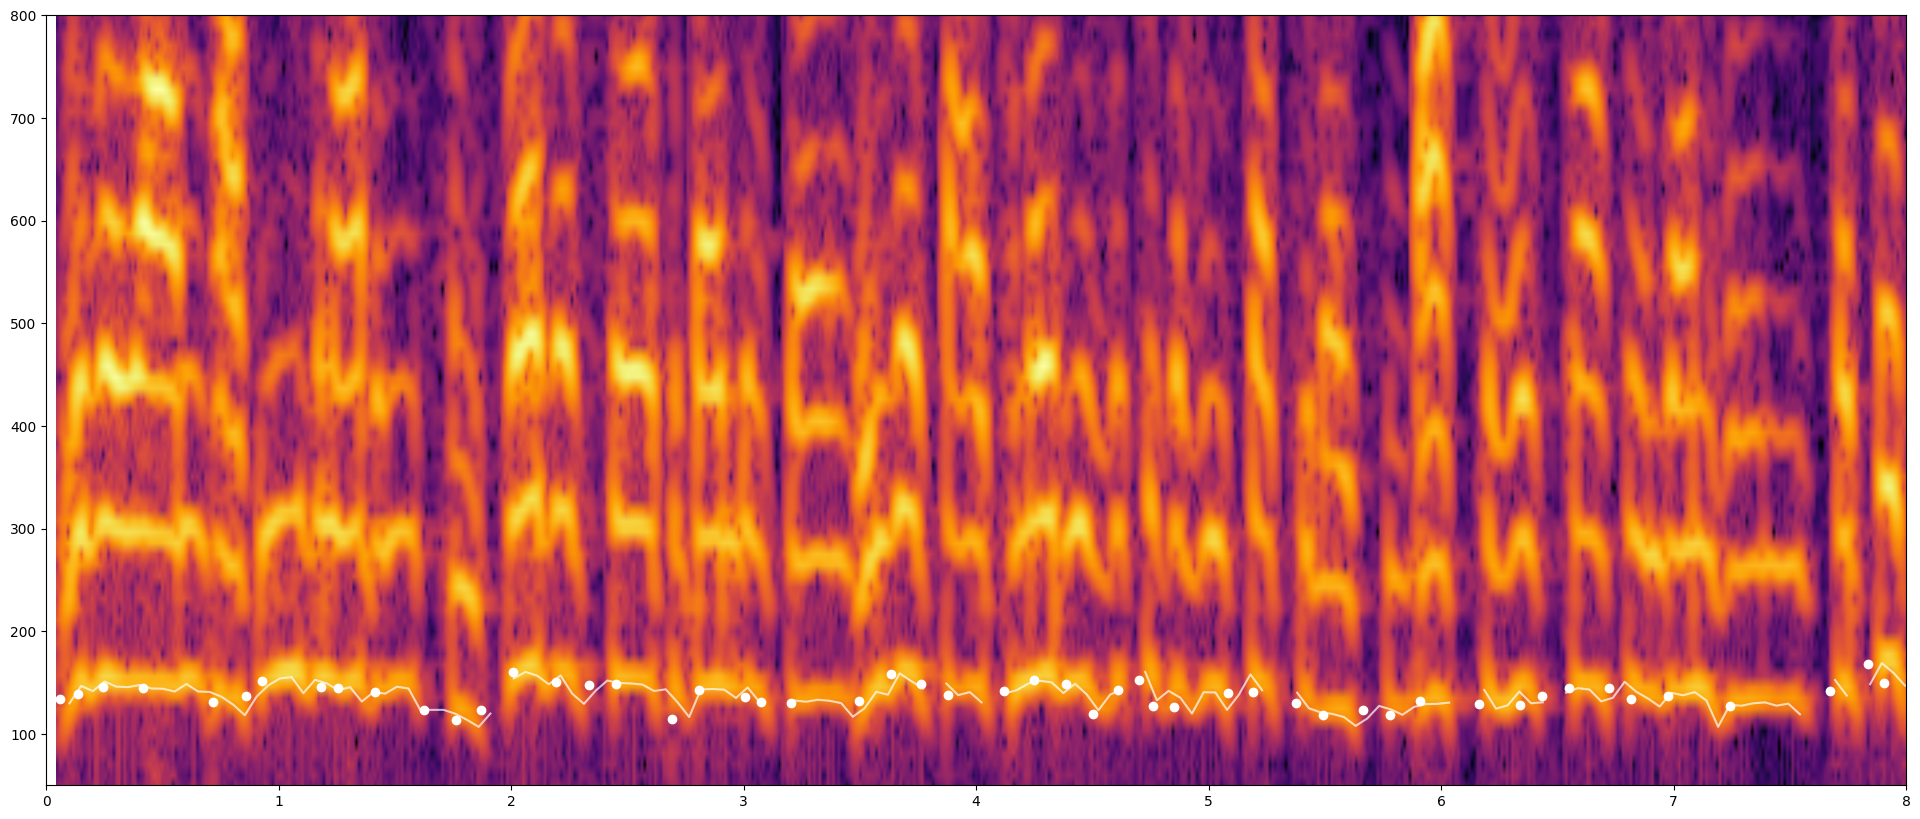

In [5]:
ampcurve = samp.peaksBpf(framedur=0.01, overlap=4)
amps = ampcurve.map(onsets)
freqs = freqbpf.map(onsets+0.05)

ax = samp.plotSpectrogram(fftsize=4092, overlap=8, maxfreq=800, minfreq=50)
(freqbpf * (ampcurve > 0.01).nanmask()).plot(axes=ax, color=(1, 1, 1, 0.7), show=False)
ax.scatter(onsets, freqs, color=(1, 1, 1), zorder=3)
ax.set_xlim(0, 8)

Chain([3C+30:-20dB:~2/25♩, 3D♭-06:-4dB:~2/19♩, 3D-16:-3dB:~4/23♩, 3D-35:-1dB:~3/10♩, 3C-01:-7dB:~4/29♩, 3D♭-33:-11dB:~2/29♩, 3E♭-49:-8dB:~8/31♩, 3D-23:-6dB:~2/29♩, 3D-28:-4dB:~5/31♩, 3C♯+24:-7dB:~5/24♩, …])
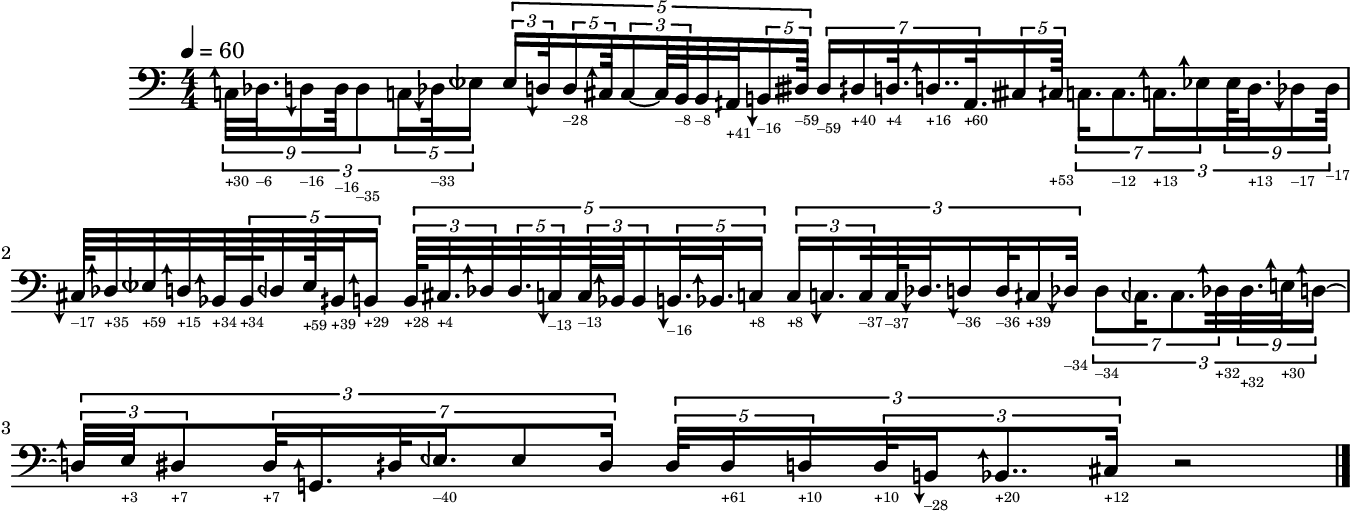

In [6]:
durs = np.empty_like(onsets)
durs[:-1] = onsets[1:] - onsets[:-1]
durs[-1] = durs[0]

notes = []
minamp = db2amp(-25)
lastfreq = next(f for f in freqs if not np.isnan(f))
for freq, dur, amp in zip(freqs, durs, amps):
    if np.isnan(freq):
        note = Note(f2m(lastfreq), dur=dur, amp=amp, label='k') if amp > minamp else Rest(dur=dur)
        notes.append(note)
    else:
        notes.append(Note(f2m(freq), dur=dur, amp=amp**0.5))
        lastfreq = freq
voice = Chain(notes)
voice

## Sync playback

`play` can be used to synthesize events ensuring synchronicity between these events and any other sound played through the audio engine itself. Within `play` all setup operations and scheduling are handled as to ensure that events scheduled to sound simultaneous are played in sync even in the context of large number of notes and automation with complex setups (reading tables, loading soundfonts, etc)

The most common way to use `play` is as a context manager. It returns a SynchronizedContext which has the same interface as a csoundengine's Session

In [7]:
with play() as s:
    voice.play(gain=2, instr='.piano', fade=(0, 0.2), sustain=0.2, position=0)
    samp.play(engine=s.engine, pan=1)
s

created pipewire module
--Csound version 7.0 (double samples) Sep  3 2025
[commit: 34766e06e640abd1d7c556f218b17353def26481]
using libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

## Absolute time / Symbolic time

The same score can be notated in any tempo without affecting its absolute time. **For that it is necessary to set the times (offset, duration) of the notes according to the new tempo**, remapping one score structure to another. Thus, the notation reflects the new score structure but playback is unaffected. **NB: the new tempo and time signature result in a completely different quantization**

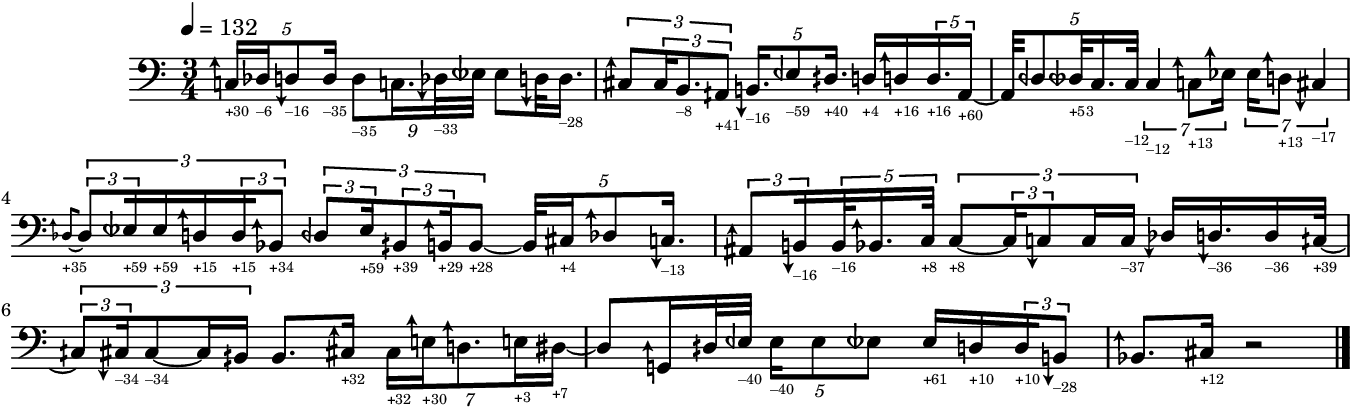

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=64)
    Synth(‖ preset:.piano=401.0699 start=133.817 dur=.081 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=48.3006 p21=0.0953637 p22=0.0812698 p23=48.3006 …)
    Synth(‖ preset:.piano=401.07 start=133.898 dur=.104 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=48.9373 p21=0.659682 p22=0.10449 p23=48.9373 …)
    Synth(‖ preset:.piano=401.0701 start=134.002 dur=.174 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=49.8352 p21=0.746473 p22=0.17415 p23=49.8352 …)
    Synth(‖ preset:.piano=401.0702 start=134.177 dur=.302 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=49.6489 p21=0.845051 p22=0.301859 p23=49.6489 …)
    Synth(‖ preset:.piano=401.0703 start=134.478 dur=.139 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=47.9851 p21=0.451235 p22=0.13932 p23=47.9851 …)
    Synth(‖ preset:.piano=401.0704 start=134.618 dur=.07 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=48.6738 p21=0.27114 p22=0.0696599 p23=48.6738 …)
    Synth(‖ preset:.piano=401.0705 start=134.687 dur=.255 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=50.5064 p21=0.387093 p22=0.25542 p23=50.5064 …)
    Synth(‖ preset:.piano=401.0706 start=134.943 dur=.07 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=49.7664 p21=0.481404 p22=0.0696599 p23=49.7664 …)
    Synth(‖ preset:.piano=401.0707 start=135.012 dur=.163 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=49.7171 p21=0.668209 p22=0.16254 p23=49.7171 …)
    Synth(‖ preset:.piano=401.0708 start=135.175 dur=.209 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=49.2431 p21=0.422248 p22=0.20898 p23=49.2431 …)
    Synth(‖ preset:.piano=401.0709 start=135.384 dur=.139 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=46.9214 p21=0.136572 p22=0.13932 p23=46.9214 …)
    Synth(‖ preset:.piano=401.071 start=135.523 dur=.104 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=45.4085 p21=0.368482 p22=0.10449 p23=45.4085 …)
    Synth(‖ preset:.piano=401.0711 start=135.628 dur=.139 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=46.8443 p21=0.188393 p22=0.13932 p23=46.8443 …)
    Synth(‖ preset:.piano=401.0712 start=135.767 dur=.186 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=51.4114 p21=0.649246 p22=0.18576 p23=51.4114 …)
    Synth(‖ preset:.piano=401.0713 start=135.953 dur=.139 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=50.4002 p21=0.552427 p22=0.13932 p23=50.4002 …)
    Synth(‖ preset:.p

In [17]:
newstruct = ScoreStruct((3, 4), tempo=132)

# Remaps times to new struct, sets it as the active struct for the new score
sco = Score([voice]).remap(newstruct, setStruct=False)  
sco.show()
sco.play()

Another version of the transcription, this time with a slower tempo and a *7/16* time signature, played with long sustain, as if the piano pedal was held down

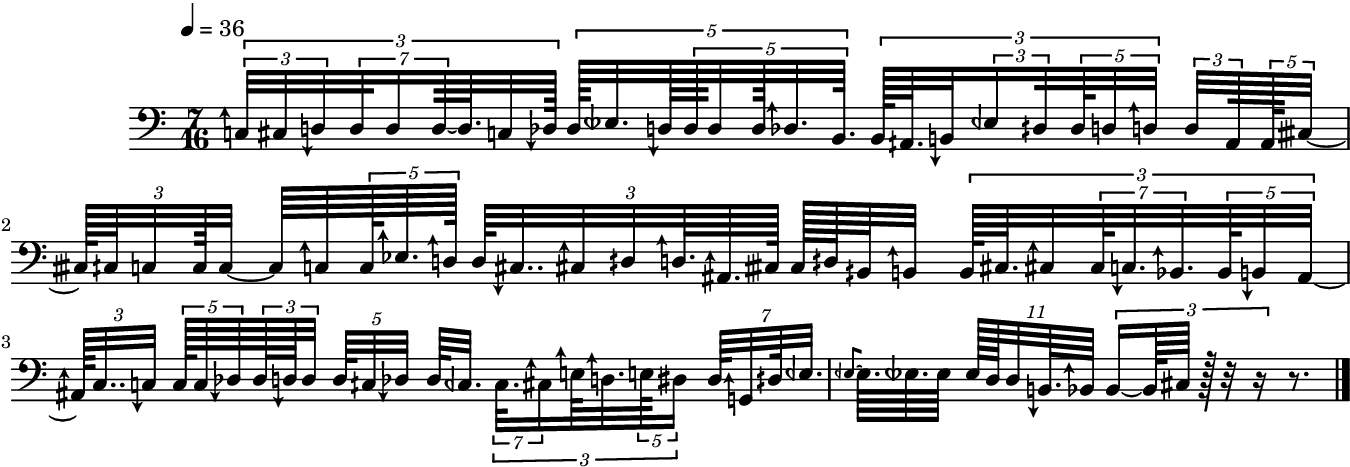

In [9]:
newstruct = ScoreStruct((7, 16), tempo=36)
voice3 = voice.remap(newstruct)
with play() as s:
    voice3.show(cents=False)
    voice3.play(gain=2, instr='.piano', fade=(0, 3), sustain=3)
    s.session.playSample((samp.samples, samp.sr), pan=1)

In [10]:
voice4 = voice.quantizePitch(step=0.5)

with play() as s:
    voice4.play(gain=1.5, position=0)
    s.session.playSample((samp.samples, samp.sr), pan=1)
    

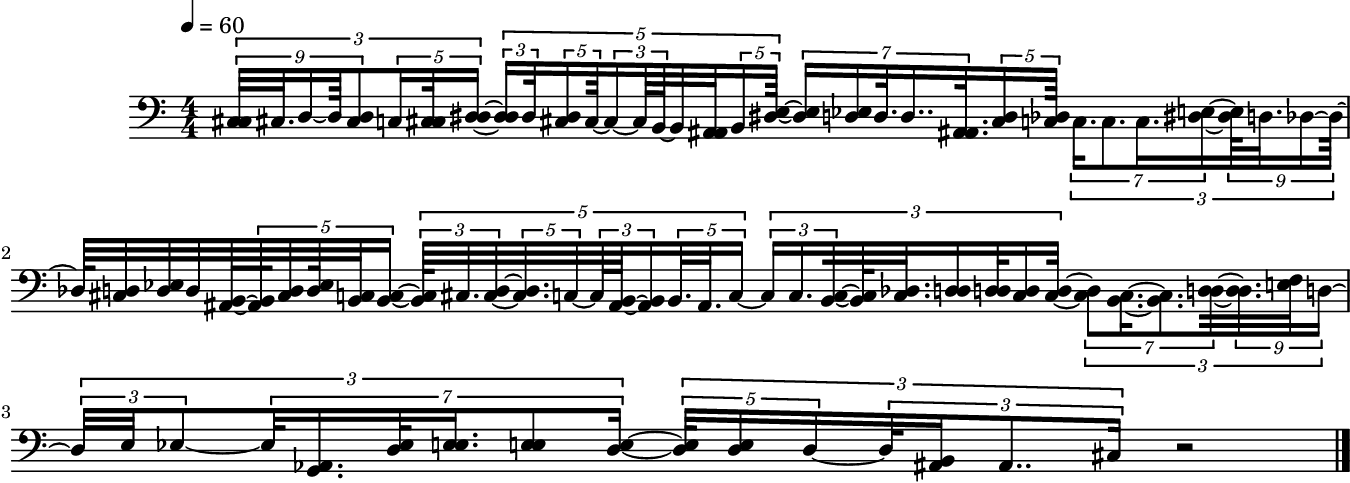

In [11]:
events = []
for event in voice4.flatEvents():
    if event.pitch > int(event.pitch):
        low = int(event.pitch)
        event = Chord(notes=[low, low+1], dur=event.dur, amp=event.amp)
    events.append(event)
        
voice5 = voice4.clone(items=events)
voice5.show()

In [19]:
voice5.play(sustain=0.3, fade=(0, 0.2))

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=101)
    Synth(‖ preset:.piano=401.0864 start=264.547 dur=.381 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.0812698 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=48 p21=0.0953637 p22=0.0812698 p23=48 …)
    Synth(‖ preset:.piano=401.0865 start=264.547 dur=.381 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.0812698 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=49 p21=0.0953637 p22=0.0812698 p23=49 …)
    Synth(‖ preset:.piano=401.0866 start=264.629 dur=.404 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.10449 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=49 p21=0.659682 p22=0.10449 p23=49 …)
    Synth(‖ preset:.piano=401.0867 start=264.733 dur=.474 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.17415 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=50 p21=0.746473 p22=0.17415 p23=50 …)
    Synth(‖ preset:.piano=401.0868 start=264.907 dur=.602 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.2 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=49 p21=0.845051 p22=0.301859 p23=49 …)
    Synth(‖ preset:.piano=401.0869 start=264.907 dur=.602 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.2 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=50 p21=0.845051 p22=0.301859 p23=50 …)
    Synth(‖ preset:.piano=401.087 start=265.209 dur=.439 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.13932 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=48 p21=0.451235 p22=0.13932 p23=48 …)
    Synth(‖ preset:.piano=401.0871 start=265.348 dur=.37 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.0696599 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=48 p21=0.27114 p22=0.0696599 p23=48 …)
    Synth(‖ preset:.piano=401.0872 start=265.348 dur=.37 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.0696599 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=49 p21=0.27114 p22=0.0696599 p23=49 …)
    Synth(‖ preset:.piano=401.0873 start=265.418 dur=.555 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.2 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=50 p21=0.387093 p22=0.25542 p23=50 …)
    Synth(‖ preset:.piano=401.0874 start=265.418 dur=.555 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.2 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=51 p21=0.387093 p22=0.25542 p23=51 …)
    Synth(‖ preset:.piano=401.0875 start=265.674 dur=.37 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.0696599 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=50 p21=0.481404 p22=0.0696599 p23=50 …)
    Synth(‖ preset:.piano=401.0876 start=265.743 dur=.463 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.16254 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=49 p21=0.668209 p22=0.16254 p23=49 …)
    Synth(‖ preset:.piano=401.0877 start=265.743 dur=.463 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.16254 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=50 p21=0.668209 p22=0.16254 p23=50 …)
    Synth(‖ preset:.piano=401.0878 start=265.906 dur=.509 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.2 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=49 p21=0.422248 p22=0.20898 p23=49 …)
    Synth(‖ preset:.piano=401.0879 start=266.115 dur=.439 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0 ifadeout=0.13932 ipchintrp_=0 ifadekind=1 ktransp